In [1]:
import pandas as pd

df = pd.read_csv('age_spend.csv')
df.head()

,spend,age
0,2725.0,20.0
1,3010.0,38.0
2,2782.0,25.0
3,2809.0,31.0
4,2774.0,54.0


In [2]:
X = df[['age']]

y = df['spend']

In [3]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split\
                                   (X, y, random_state = 10)

In [4]:
from sklearn.tree import DecisionTreeRegressor

max2_tree_model = DecisionTreeRegressor(max_depth=2)
max2_tree_model.fit(X_train,y_train)

max5_tree_model = DecisionTreeRegressor(max_depth=5)
max5_tree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error
 
linear_predictions = model.predict(X_test)
print('Linear model RMSE: ' + \
      str(mean_squared_error(linear_predictions, y_test)**0.5))
 
max2_tree_predictions = max2_tree_model.predict(X_test)
print('Tree with max depth of 2 RMSE: ' + \
      str(mean_squared_error(max2_tree_predictions, y_test)**0.5))
 
max5_tree_predictions = max5_tree_model.predict(X_test)
print('tree with max depth of 5 RMSE: ' + \
      str(mean_squared_error(max5_tree_predictions, y_test)**0.5))

Linear model RMSE: 159.07639273785358
Tree with max depth of 2 RMSE: 125.1920405443602
tree with max depth of 5 RMSE: 109.73376798374653


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

ages = pd.DataFrame({'age':range(18,70)})

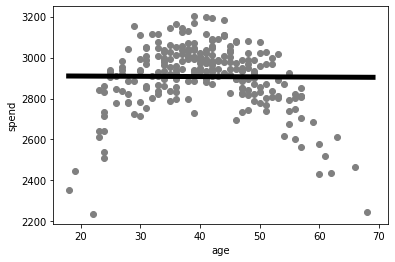

In [8]:
plt.scatter(X_test.age.tolist(), y_test.tolist(),color='gray')
plt.plot(ages,model.predict(ages), color='k', linewidth=5, \
         label="Linear Regression")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

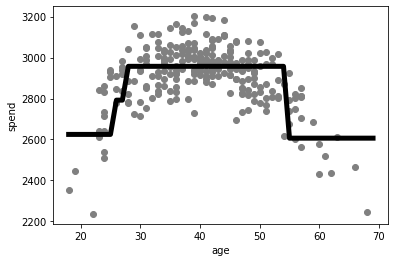

In [9]:
plt.scatter(X_test.age.tolist(), y_test.tolist(),color='gray')
plt.plot(ages,max2_tree_model.predict(ages), \
         color='k',linewidth=5,label="Tree with max depth 2")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

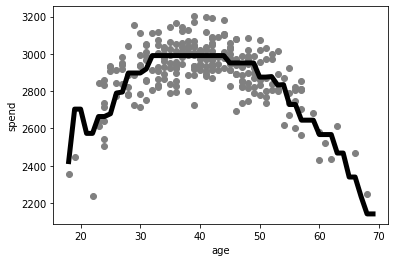

In [10]:
plt.scatter(X_test.age.tolist(), y_test.tolist(),color='gray')
plt.plot(ages,max5_tree_model.predict(ages), color='k',\
         linewidth=5, label="Tree with max depth 5")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor
 
max2_forest_model = RandomForestRegressor\
                    (max_depth=2, random_state=10)
max2_forest_model.fit(X_train,y_train)
 
max5_forest_model = RandomForestRegressor\
                    (max_depth=5, random_state=10)
max5_forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=10)

In [12]:
max2_forest_predictions = max2_forest_model.predict(X_test)
print('Max depth of 2 RMSE: ' + \
      str(mean_squared_error(max2_forest_predictions, \
                             y_test)**0.5))
 
max5_forest_predictions = max5_forest_model.predict(X_test)
print('Max depth of 5 RMSE: ' + \
      str(mean_squared_error(max5_forest_predictions, \
                             y_test)**0.5))

Max depth of 2 RMSE: 116.57417072810561
Max depth of 5 RMSE: 109.05510027963649


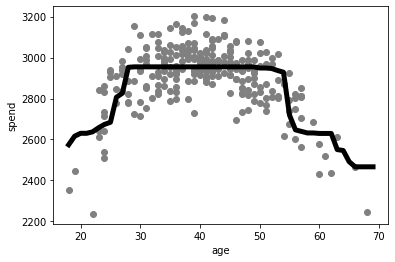

In [13]:
plt.scatter(X_test.age.tolist(), y_test.tolist(),color='gray')
plt.plot(ages,max2_forest_model.predict(ages), color='k',\
         linewidth=5, label="Forest with max depth 2")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

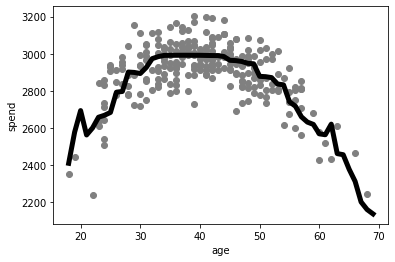

In [14]:
plt.scatter(X_test.age.tolist(), y_test.tolist(),color='gray')
plt.plot(ages,max5_forest_model.predict(ages), color='k',\
         linewidth=5, label="Forest with max depth 5")
plt.xlabel("age")
plt.ylabel("spend")
plt.show()

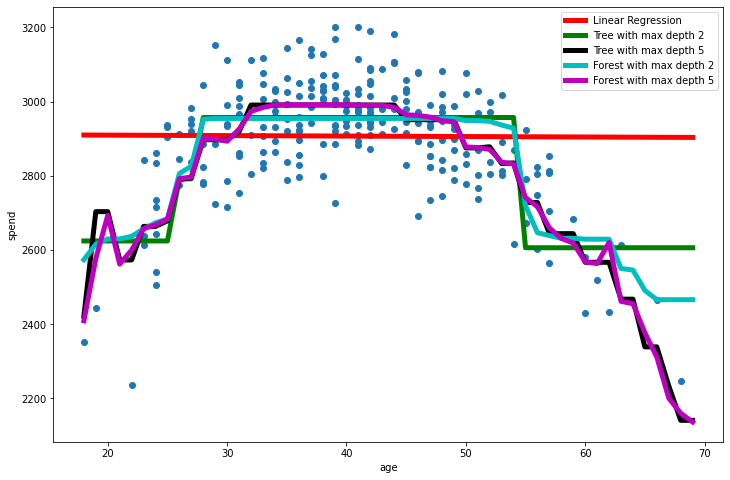

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages,model.predict(ages), color='r', linewidth=5, \
         label="Linear Regression")
plt.plot(ages,max2_tree_model.predict(ages), color='g',\
         linewidth=5,label="Tree with max depth 2")
plt.plot(ages,max5_tree_model.predict(ages), color='k',\
         linewidth=5, label="Tree with max depth 5")
plt.plot(ages,max2_forest_model.predict(ages), color='c',\
         linewidth=5, label="Forest with max depth 2")
plt.plot(ages,max5_forest_model.predict(ages), color='m',\
         linewidth=5, label="Forest with max depth 5")
plt.legend()
plt.xlabel("age")
plt.ylabel("spend")
plt.show()